In [50]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

df=pd.read_csv('zomato.csv')

In [51]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [52]:
df_country=pd.read_excel("C:\\Users\\ACER\\Downloads\\Country-Code.xlsx")

In [53]:
df_country.head(2)

,Country Code,Country
0,1,India
1,14,Australia


In [54]:
final_df = df.merge(df_country, on='Country Code', how='left')
final_df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [55]:
final_df.to_csv('final_merged_data.csv', index=False)

In [56]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [4]:
import pandas as pd 
final_df=pd.read_csv('final_merged_data.csv')
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [57]:
#splitting data into independent and dependent features
X=final_df.drop(labels=['Aggregate rating'],axis=1)

In [58]:
y = final_df[['Aggregate rating']]


In [59]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [60]:
X = preprocessor.fit_transform(X)

In [61]:
X.shape

(9551, 20857)

In [62]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((7640, 20857), (1911, 20857))

In [63]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [64]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0024
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3028
- Mean Absolute Error: 0.2354
- R2 Score: 0.9597


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.5181
- Mean Absolute Error: 1.2239
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.5090
- Mean Absolute Error: 1.2194
- R2 Score: -0.0004


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0598
- Mean Absolute Error: 0.0426
- R2 Score: 0.9985
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1815
- Mean Absolute Error: 0.1353
- R2 Score: 0.9855


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2043
- Mean Absolute Error: 0.1207
- R2 Score: 0.9819
----------------------

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0622
- Mean Absolute Error: 0.0404
- R2 Score: 0.9983
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1646
- Mean Absolute Error: 0.1088
- R2 Score: 0.9881


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.1300
- Mean Absolute Error: 0.0932
- R2 Score: 0.9927
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1614
- Mean Absolute Error: 0.1105
- R2 Score: 0.9885


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1416
- Mean Absolute Error: 0.1020
- R2 Score: 0.9913
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1597
- Mean Absolute Error: 0.1111
- R2 Score: 0.9888




c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1884
- Mean Absolute Error: 0.1359
- R2 Score: 0.9846
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1891
- Mean Absolute Error: 0.1368
- R2 Score: 0.9843




In [65]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
7,CatBoosting Regressor,0.988800
6,XGBRegressor,0.988550
5,Random Forest Regressor,0.988092
2,Ridge,0.985520
8,AdaBoost Regressor,0.984296
4,Decision Tree,0.977580
3,K-Neighbors Regressor,0.967400
0,Linear Regression,0.959727
1,Lasso,-0.000447


In [69]:
linear_model = LinearRegression(fit_intercept=True)
linear_model = linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 95.97


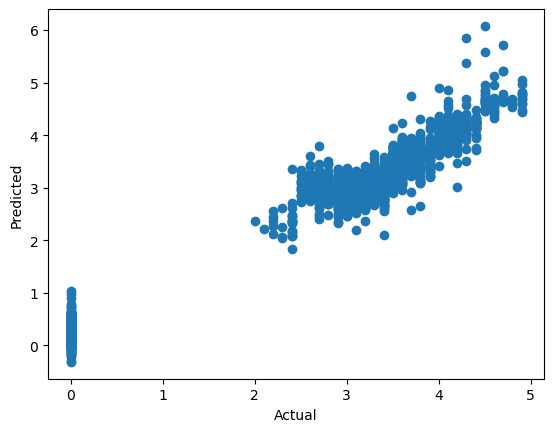

In [70]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

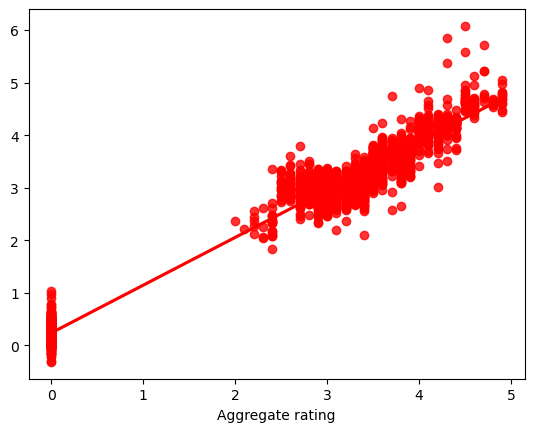

In [71]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [74]:
import pandas as pd

# Ensure y_test is a one-dimensional array
y_test_values = y_test.values.flatten() if isinstance(y_test, pd.DataFrame) else y_test.flatten()

# Ensure y_pred is a one-dimensional array
y_pred_values = y_pred.flatten() if isinstance(y_pred, pd.DataFrame) else y_pred.flatten()

# Create the DataFrame pred_df
pred_df = pd.DataFrame({'Actual Value': y_test_values, 'Predicted Value': y_pred_values, 'Difference': y_test_values - y_pred_values})

# Display pred_df
print(pred_df)

print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)



      Actual Value  Predicted Value  Difference
0              2.1         2.214389   -0.114389
1              4.1         3.876293    0.223707
2              3.2         2.889625    0.310375
3              4.4         3.973299    0.426701
4              3.5         3.049704    0.450296
...            ...              ...         ...
1906           2.6         2.919785   -0.319785
1907           0.0         0.383219   -0.383219
1908           3.1         2.771381    0.328619
1909           4.2         3.668665    0.531335
1910           4.3         4.353416   -0.053416

[1911 rows x 3 columns]
Shape of y_test: (1911, 1)
Shape of y_pred: (1911, 1)


0.9984301412872841

Accuracy Score: 99.83999999999999
Confusion Matrix:
 [[   6    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   13    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     3]
 [   0    0    0 1724    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    4    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    6    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    8    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    4    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    5    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0   13    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    6    0    0    0
     0]
 [   0    0    0    0    0    0    0    0    0    0    0    5    0 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd

# Ensure y_test is a one-dimensional array
y_test_values = y_test.values.flatten()

# Create the DataFrame pred_df
pred_df = pd.DataFrame({'Actual Value': y_test_values, 'Predicted Value': predictions})

# Display pred_df
print(pred_df)



       Actual Value Predicted Value
0             India           India
1             India           India
2             India           India
3             India           India
4             India           India
...             ...             ...
1906          India           India
1907          India           India
1908          India           India
1909          India           India
1910  United States   United States

[1911 rows x 2 columns]


In [ ]:
print("Shape of y_test:", y_test.shape)
print("Shape of predictions:", predictions.shape)


Shape of y_test: (1911, 1)
Shape of predictions: (1911,)
